In [3]:
library(Seurat)
library(ggplot2)
library(cowplot)
library(RColorBrewer)
library(crunch)
library(testSctpa)
library(openxlsx)


In [72]:
SIGNATURES_PATH = 'project_path/Supplementary Table 3.xlsx'
META_PATH = 'project_path/allCells_meta.csv'
TCELL_COUNT_PATH = 'project_path/Tcell/count.rds'
BCELL_COUNT_PATH = 'project_path/Bcell/count.rds'

In [5]:
sigs = read.xlsx(SIGNATURES_PATH)

In [7]:
Tex = as.character(sigs[1,4:ncol(sigs)])
Tex = Tex[!is.na(Tex)]
ImmuRes = as.character(sigs[2,4:ncol(sigs)])
ImmuRes = ImmuRes[!is.na(ImmuRes)]
progenitor = as.character(sigs[3,4:ncol(sigs)])
progenitor = progenitor[!is.na(progenitor)]
terminal = as.character(sigs[4,4:ncol(sigs)])
terminal = terminal[!is.na(terminal)]

In [44]:
gsets = vector(mode='list')
gsets[['T cell exxhaustion']] = Tex
gsets[['T cell mediated immune response to tumor cell']] = ImmuRes
gsets[['Progenitor Exhausted CD8']] = progenitor
gsets[['Terminally Exhausted CD8']] = terminal

## T cell signatures
* calculated by Vision wrapped in [testSctpa](https://github.com/zgyaru/testSctpa)

In [11]:
count = readRDS(TCELL_COUNT_PATH)

[1] "Seurat"
attr(,"package")
[1] "SeuratObject"

In [14]:
score = calVision(count, gSets = gsets)

In [20]:
meta = read.csv(META_PATH,row.names=1)
head(meta)

,n_genes_by_counts,total_counts,pct_counts_hb,pct_counts_mt,pct_counts_hb.1,pct_counts_rb,treat,sample,group,treat_group,majorCluster,subCluster,if_CD3,if_CD45,treat_sample,if_CD8,if_CD4
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>
AAACCCAAGACTCGAG-1-Pre-A,4658,23259,0.01289823,2.622641,0.01289823,12.03405,Pre,P001,NCR,Pre_NCR,Endothelial cells,TEC-IGKC,0,0,Pre_P001,0,0
AAACCCACAAATCAAG-1-Pre-A,2210,8586,0.05823434,2.201258,0.05823434,18.92616,Pre,P001,NCR,Pre_NCR,T cells,CD4+ Tem,1,1,Pre_P001,0,0
AAACCCAGTCATTCCC-1-Pre-A,476,691,0.00000000,2.315485,0.00000000,16.35311,Pre,P001,NCR,Pre_NCR,Pericytes,PC-IGHG1,0,0,Pre_P001,0,0
AAACCCAGTTAGTCGT-1-Pre-A,1764,4515,0.00000000,3.034330,0.00000000,22.85714,Pre,P001,NCR,Pre_NCR,T cells,CD8+ Tex-SPRY1,1,1,Pre_P001,1,0
AAACCCATCTACGGTA-1-Pre-A,1466,4442,0.02251238,3.714543,0.02251238,26.63215,Pre,P001,NCR,Pre_NCR,T cells,CD4+ Tcm,1,1,Pre_P001,1,0
AAACGAAAGAGGTCGT-1-Pre-A,3812,13020,0.06912442,2.096774,0.06912442,10.76805,Pre,P001,NCR,Pre_NCR,Endothelial cells,Artery,0,0,Pre_P001,0,0


In [41]:
plot_data = data.frame(t(as.matrix(score)))
plot_data$cellType = meta[colnames(count),'subCluster']
plot_data$treat_group = factor(meta[colnames(count),'treat_group'],levels = c('Pre_NCR','Pre_CR','Post_NCR','Post_CR'))
plot_data$treat = factor(meta[colnames(count),'treat'],levels = c('Pre','Post'))
plot_data$group = factor(meta[colnames(count),'group'],levels = c('NCR','CR'))
colnames(plot_data) = gsub('\\.',' ',colnames(plot_data))

In [45]:
colnames(plot_data) = c('T cell exhaustion','T cell mediated immune response to tumor cell',colnames(plot_data)[3:ncol(plot_data)])

### Figure 2B
* T cell exhuastion
* T cell mediated immune response to tumor cell

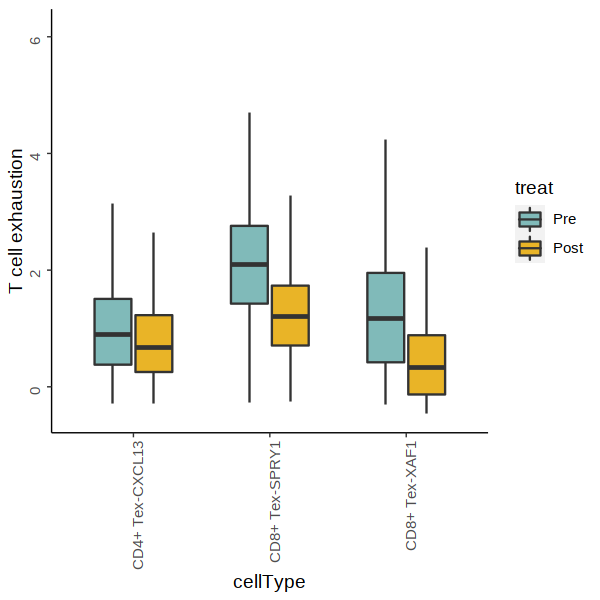

In [47]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13'),],
       aes(x=cellType,y=`T cell exhaustion`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

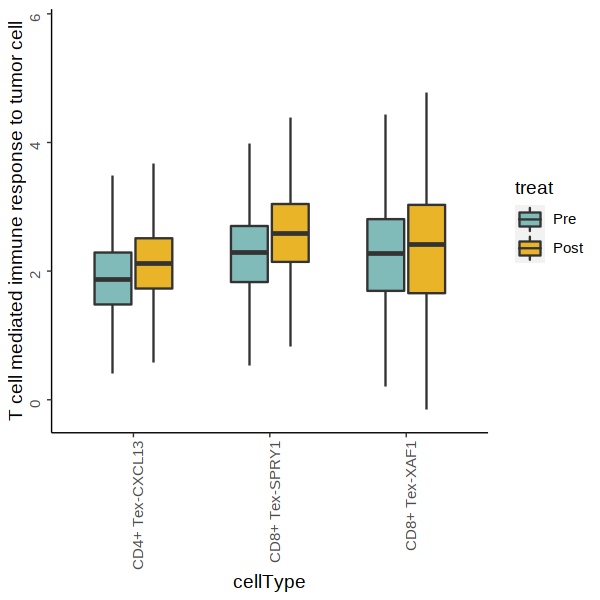

In [48]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13'),],
       aes(x=cellType,y=`T cell mediated immune response to tumor cell`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

### Figure 2I

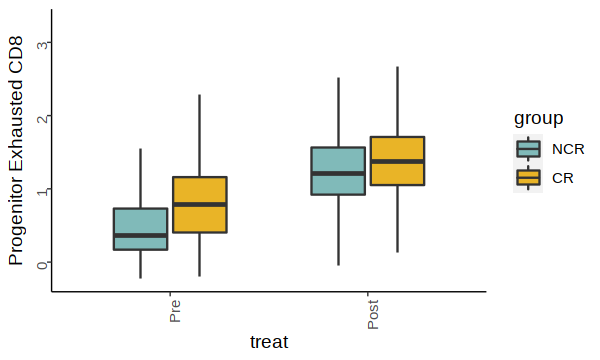

In [50]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(plot_data[plot_data$cellType == 'CD8+ Tex-SPRY1',],
       aes(x=treat,y=`Progenitor Exhausted CD8`,fill=group))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = -1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

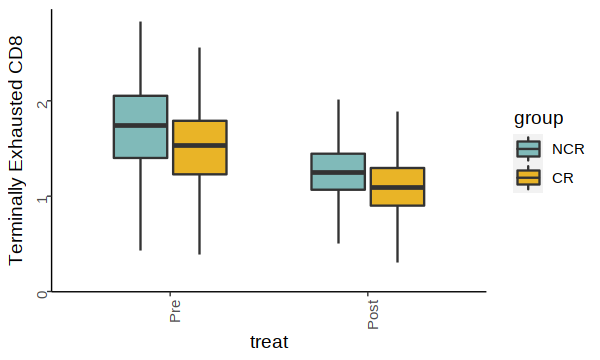

In [49]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(plot_data[plot_data$cellType == 'CD8+ Tex-SPRY1',],
       aes(x=treat,y=`Terminally Exhausted CD8`,fill=group))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = -1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

### Figure S2C

#### T cell exhaustion: CR vs NCR

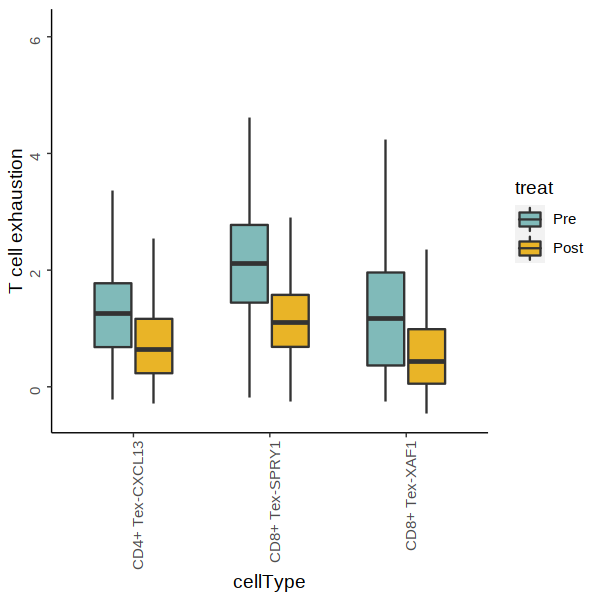

In [52]:
#################    CR    ####################

options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13') & plot_data$group == 'CR',],
       aes(x=cellType,y=`T cell exhaustion`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

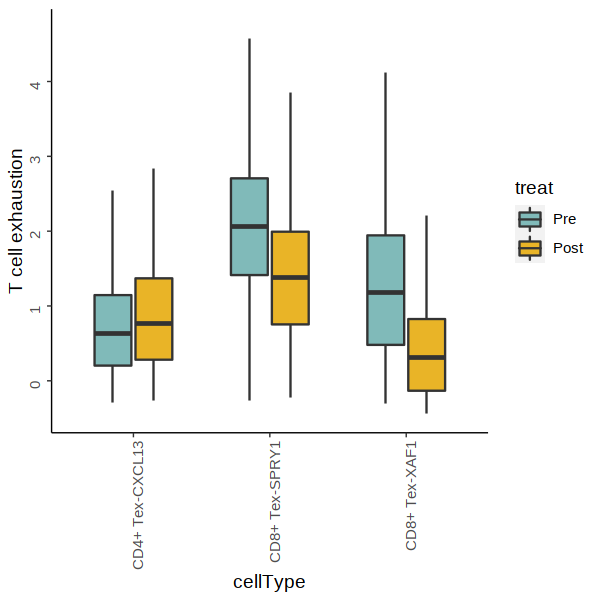

In [53]:
#################    NCR    ####################

options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13') & plot_data$group == 'NCR',],
       aes(x=cellType,y=`T cell exhaustion`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

#### T cell mediated immune response to tumor cell: CR vs NCR

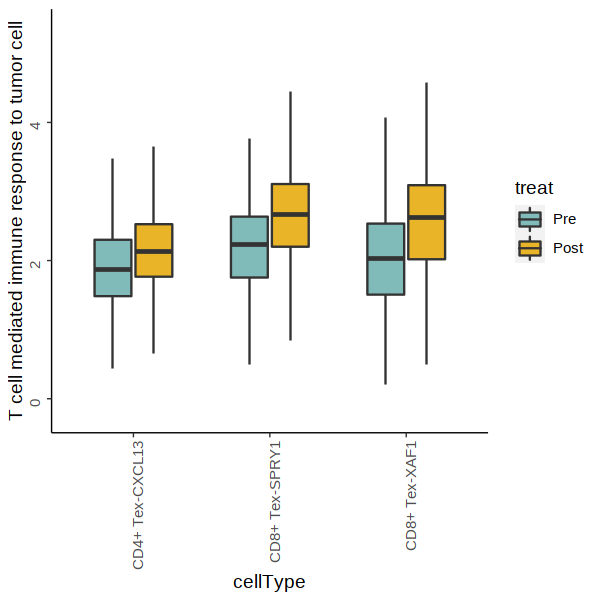

In [54]:
#################    CR    ####################

options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13')& plot_data$group == 'CR',],
       aes(x=cellType,y=`T cell mediated immune response to tumor cell`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

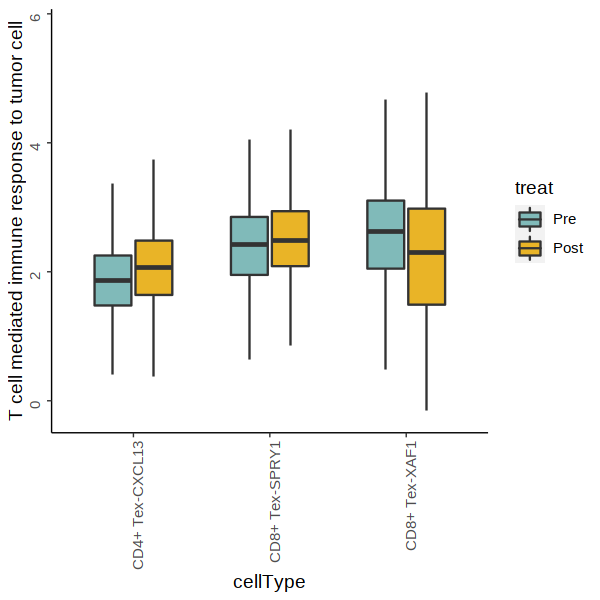

In [55]:
#################    NCR    ####################

options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data[plot_data$cellType %in% c('CD8+ Tex-SPRY1','CD8+ Tex-XAF1','CD4+ Tex-CXCL13')& plot_data$group == 'NCR',],
       aes(x=cellType,y=`T cell mediated immune response to tumor cell`,fill=treat))+
  geom_boxplot(width=0.6,outlier.size = 0,outlier.stroke=0)+
  scale_fill_manual(values=c('#80BAB9','#E9B427'))+ 
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

## B cell signatures
* calculated by Vision wrapped in [testSctpa](https://github.com/zgyaru/testSctpa)

In [56]:
gsets = list(TLS = c('CCL19', 'CCL21', 'CXCL13', 'CCR7', 'SELL', 'LAMP3', 'CXCR4', 'CD86', 'BCL6'))

In [57]:
b_count = readRDS(BCELL_COUNT_PATH)

In [62]:
b_score = calVision(b_count, gSets = gsets)

In [65]:
plot_data = data.frame(t(as.matrix(b_score)))
plot_data$cellType = meta[colnames(b_count),'subCluster']
plot_data$treat_group = factor(meta[colnames(b_count),'treat_group'],levels = c('Pre_CR','Post_CR','Pre_NCR','Post_NCR'))
plot_data$treat = factor(meta[colnames(b_count),'treat'],levels = c('Pre','Post'))
plot_data$group = factor(meta[colnames(b_count),'group'],levels = c('NCR','CR'))
colnames(plot_data) = gsub('\\.',' ',colnames(plot_data))
head(plot_data)

,TLS,cellType,treat_group,treat,group
,<dbl>,<chr>,<fct>,<fct>,<fct>
AAACGAAAGTCAGCGA-1-Pre-A,0.6019899,Bmem,Pre_NCR,Pre,NCR
AAAGAACCAATTGCTG-1-Pre-A,0.8563765,Bmem,Pre_NCR,Pre,NCR
AAAGAACCACACCGCA-1-Pre-A,0.5368269,Bmem,Pre_NCR,Pre,NCR
AAAGGATGTAATTGGA-1-Pre-A,0.5697201,Bmem,Pre_NCR,Pre,NCR
AAAGGATGTTGGAGGT-1-Pre-A,-0.1794551,Bmem,Pre_NCR,Pre,NCR
AAAGTCCTCCTAGAGT-1-Pre-A,1.4124441,Bmem,Pre_NCR,Pre,NCR


### Figure 6D

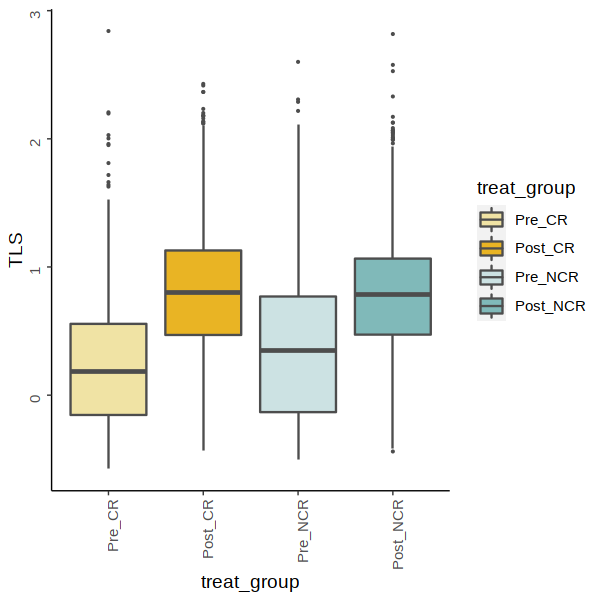

In [69]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(plot_data,
       aes(x=treat_group,y=TLS,fill=treat_group))+
  geom_boxplot(colour='gray30',width=0.8,outlier.size = 0.1)+
  scale_fill_manual(values = c("#F0E3A4", "#E9B424", "#CCE2E3", "#80B9B9"))+
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))

### Figure 6E

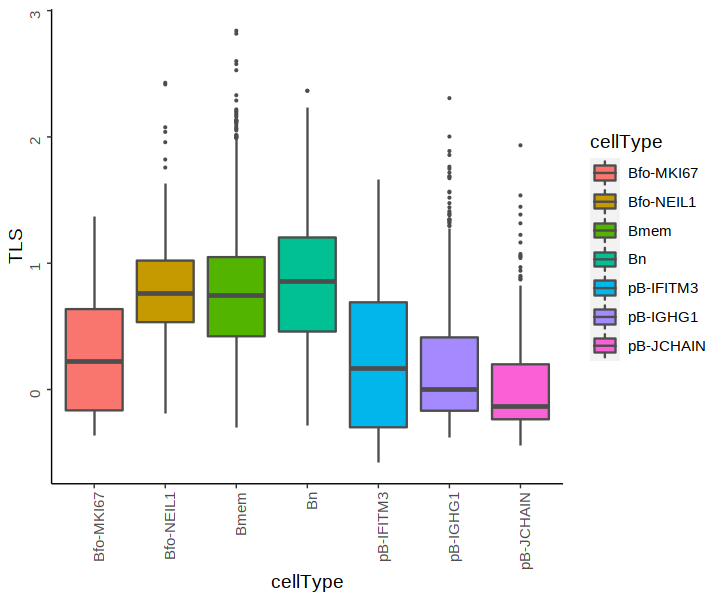

In [71]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(plot_data,
       aes(x=cellType,y=TLS,fill=cellType))+
  geom_boxplot(colour='gray30',width=0.8,outlier.size = 0.1)+
  theme(
    panel.background = element_rect(fill = "transparent",colour = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text = element_text(angle = 90,vjust = 1,hjust = 1),
    axis.ticks = element_line(size = 0.3),
    axis.line = element_line(size = 0.3),
    plot.title = element_text(size=5,hjust = 0.5))